In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_excel(r"C:\Users\USER\Desktop\DATA  SCIENCE\Excel Workbooks Tsi\co2_emmision_by_vehicle.xlsx")

In [23]:
df.head(10)

,car_id,Transmission,Engine Size (cm3),Fuel Type,Powertrain,CO2 emission,Engine Size (cm3) (bins)
0,269,Manual,999,Petrol,Internal Combustion Engine (ICE),155,0.0
1,270,Manual,999,Petrol,Internal Combustion Engine (ICE),166,0.0
2,279,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0.0
3,280,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0.0
4,283,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0.0
5,284,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0.0
6,287,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0.0
7,291,Manual,999,Petrol,Internal Combustion Engine (ICE),147,0.0
8,292,Manual,999,Petrol,Internal Combustion Engine (ICE),160,0.0
9,479,Manual,999,Petrol,Internal Combustion Engine (ICE),120,0.0


Based on your dataset, which includes features related to cars such as
transmission type, engine size, fuel type, powertrain, and CO2
emissions, you could define a clustering problem to group similar cars
together based on their characteristics. Here's how you could frame the
problem:

Problem Definition:
Cluster cars based on their attributes to identify groups of vehicles
with similar characteristics.

Objective:
The objective is to segment the cars into distinct groups or clusters,
where each cluster represents a set of cars with similar features. This
segmentation can help in various ways:

Market Segmentation: Understand different market segments based on car
attributes, allowing for targeted marketing strategies.

Product Planning: Identify patterns in car attributes to inform product
planning and development decisions.

Customer Insights: Gain insights into customer preferences by analyzing
the characteristics of cars they prefer.

Environmental Impact Analysis: Analyze the distribution of CO2 emissions
across different car types and identify trends or areas for improvement.

Features:

Transmission: Type of transmission (e.g., manual, automatic).
Engine Size (cm3): The size of the car's engine in cubic centimeters.
Fuel Type: Type of fuel used by the car (e.g., petrol, electricity).
Powertrain: The type of powertrain (e.g., internal combustion engine,
hybrid).
CO2 Emission: The amount of CO2 emissions produced by the car.
Proposed Solution:
Use k-means clustering to group cars into clusters based on their
attributes. This will enable the identification of distinct groups of
cars with similar characteristics. The number of clusters (k) needs to
be determined based on the characteristics of the dataset and the
desired level of granularity in segmentation.

Validation and Interpretation:
After clustering, evaluate the results using metrics like silhouette
score, within-cluster sum of squares (WCSS), or visual inspection of
clusters. Interpret the clusters to understand the characteristics of
each group and assess whether the segmentation aligns with domain
knowledge or business goals.

Potential Insights:

Identification of car segments based on attributes such as engine size,
transmission type, and fuel type.
Understanding the relationship between CO2 emissions and other car
features.
Insights into market trends, customer preferences, and environmental
impact based on car segmentation.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654 entries, 0 to 6653
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   car_id                    6654 non-null   int64  
 1   Transmission              6654 non-null   object 
 2   Engine Size (cm3)         6654 non-null   int64  
 3   Fuel Type                 6654 non-null   object 
 4   Powertrain                6654 non-null   object 
 5   CO2 emission              6654 non-null   int64  
 6   Engine Size (cm3) (bins)  6654 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 364.0+ KB


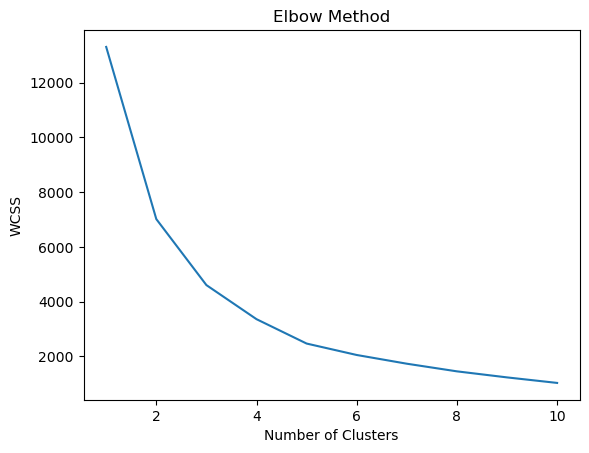

The average silhouette_score is : 0.4196839235589801


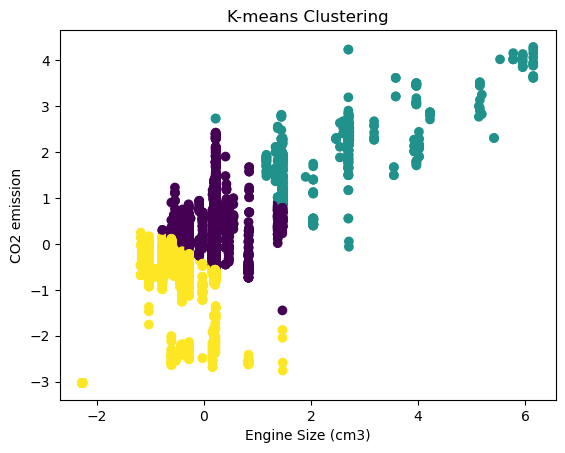

In [20]:
# Step 1: Data Preprocessing
#import pandas as pd
#from sklearn.preprocessing import LabelEncoder, StandardScaler
#from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
#from sklearn.metrics import silhouette_score
#import warnings
#warnings.filterwarnings("ignore")


# Load the dataset
#df = pd.read_excel(r"C:\Users\USER\Desktop\DATA  SCIENCE\Excel Workbooks Tsi\co2_emmision_by_vehicle.xlsx")

# Handle missing values if present
df.dropna(inplace=True)

# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Powertrain'] = label_encoder.fit_transform(df['Powertrain'])

# Step 2: Feature Selection
features = df[['Engine Size (cm3)', 'CO2 emission']]

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Finding Optimal Number of Clusters
wcss = []
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
     kmeans.fit(scaled_features)
     wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #Within Cluster Sum Of Squares
plt.show()

# Step 5: K-means Clustering
# Choose the optimal number of clusters based on the elbow method or
#silhouette analysis
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Step 6: Evaluation and Interpretation
# Evaluate the clustering results
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

# Visualize the clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1],
c=kmeans.labels_, cmap='viridis')
plt.xlabel('Engine Size (cm3)')
plt.ylabel('CO2 emission')
plt.title('K-means Clustering')
plt.show()
